In [1]:
import pandas as pd
import numpy as np

#for analyzing results: charts and t-test
import scipy.stats as stats
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Significance level for t-test
alpha=0.05

In [3]:
testing_dataset = pd.read_csv('/home/kate/Research/Property/Data/Experiments/Final/testing/Ecy/testing_Ecy.csv', error_bad_lines=False, index_col=False)

XGBoost Classification  model result

In [4]:
classification_ecy=pd.read_csv('/home/kate/Research/Property/Models/Experiments/Final/Ecy-2/test_predictions.csv', error_bad_lines=False, index_col=False)

Poisson Regression XGBoost models results

In [5]:
#ecy as a feature
poisson_BaseModel=pd.read_csv('/home/kate/Research/Property/Models/Experiments/BasicPoisson/BaseModel-0/test_predictions.csv', error_bad_lines=False, index_col=False)

In [6]:
#Log ecy as a feature
poisson_Log=pd.read_csv('/home/kate/Research/Property/Models/Experiments/BasicPoisson/Log-1/test_predictions.csv', error_bad_lines=False, index_col=False)

In [7]:
#ecy is an Offset (base Margin in XGBoost)
poisson_Offset=pd.read_csv('/home/kate/Research/Property/Models/Experiments/BasicPoisson/Offset-2/test_predictions.csv', error_bad_lines=False, index_col=False)

In [8]:
#ecy is an Offset (base Margin in XGBoost)
poisson_Offsetlog=pd.read_csv('/home/kate/Research/Property/Models/Experiments/BasicPoisson/Offsetlog-3/test_predictions.csv', error_bad_lines=False, index_col=False)

In [9]:
#Normalized Weighted Gini
#https://www.kaggle.com/c/liberty-mutual-fire-peril/discussion/9880
#http://blog.nguyenvq.com/blog/2015/09/25/calculate-the-weighted-gini-coefficient-or-auc-in-r/
def WeightedGini(act,pred,weight): 
    df = pd.DataFrame({"act":act,"pred":pred,"weight":weight}) 
    df = df.sort_values('pred',ascending=False) 
    df["random"] = (df.weight / df.weight.sum()).cumsum() 
    total_pos = (df.act * df.weight).sum()
    df["cumposfound"] = (df.act * df.weight).cumsum()
    df["lorentz"] = df.cumposfound / total_pos
    n = df.shape[0]
    gini = sum(df.lorentz[1:].values * (df.random[:-1])) - sum(df.lorentz[:-1].values * (df.random[1:]))
    return gini

def NormalizedWeightedGini(act,pred,weight):
    return WeightedGini(act,pred,weight) / WeightedGini(act,act,weight)
#Test
#var11 = [1, 2, 5, 4, 3] 
#pred = [0.1, 0.4, 0.3, 1.2, 0.0]
#act = [0, 0, 1, 0, 1]
#normalizedweightedgini(act,pred,var11)
#-0.821428571428572

In [10]:
Score_dataset = pd.DataFrame(columns=['Model','0','1','2','3','4','5','6','7','8','9'])

In [11]:
#XGBoost Classification score
score_l=['Classification with ecy']
for i in range(0,10):
    score = NormalizedWeightedGini(classification_ecy['actual'],classification_ecy[str(i)],testing_dataset['ecy'])
    score_l.append(score)
Score_dataset.loc[0]=score_l

In [12]:
#XGBoost Poisson ecy as a feature
score_l=['Poisson ecy as a feature']
for i in range(0,10):
    score = NormalizedWeightedGini(poisson_BaseModel['actual'],poisson_BaseModel[str(i)],testing_dataset['ecy'])
    score_l.append(score)
Score_dataset.loc[1]=score_l

In [13]:
#XGBoost Poisson ecy as a feature
score_l=['Poisson Log ecy as a feature']
for i in range(0,10):
    score = NormalizedWeightedGini(poisson_Log['actual'],poisson_Log[str(i)],testing_dataset['ecy'])
    score_l.append(score)
Score_dataset.loc[2]=score_l

In [14]:
#XGBoost Poisson ecy as an offset(base margin)
score_l=['Poisson ecy as an offset(base margin)']
for i in range(0,10):
    score = NormalizedWeightedGini(poisson_Offset['actual'],poisson_Offset[str(i)],testing_dataset['ecy'])
    score_l.append(score)
Score_dataset.loc[3]=score_l

In [15]:
#XGBoost Poisson Log ecy as an offset(base margin)
score_l=['Poisson Log ecy as an offset(base margin)']
for i in range(0,10):
    score = NormalizedWeightedGini(poisson_Offsetlog['actual'],poisson_Offsetlog[str(i)],testing_dataset['ecy'])
    score_l.append(score)
Score_dataset.loc[4]=score_l

In [16]:
folds_columns = Score_dataset.loc[:,Score_dataset.columns !='Model'].columns.to_list()
Score_dataset['mean']=Score_dataset[folds_columns].mean(axis=1)
Score_dataset['std']=Score_dataset[folds_columns].std(axis=1)
Score_dataset['sem']=Score_dataset[folds_columns].sem(axis=1)

In [17]:
Score_dataset

,Model,0,1,2,3,4,5,6,7,8,9,mean,std,sem
0,Classification with ecy,0.413801,0.411130,0.418034,0.411491,0.413330,0.414921,0.416370,0.410808,0.417323,0.417602,0.414481,0.002782,0.000880
1,Poisson ecy as a feature,0.438537,0.440718,0.440723,0.439736,0.441457,0.442157,0.440219,0.438181,0.440308,0.440894,0.440293,0.001221,0.000386
2,Poisson Log ecy as a feature,0.438537,0.440717,0.440723,0.439736,0.441457,0.442157,0.440219,0.438180,0.440308,0.440920,0.440296,0.001222,0.000387
3,Poisson ecy as an offset(base margin),0.430078,0.432299,0.431749,0.430132,0.431747,0.433500,0.431418,0.429701,0.430925,0.431514,0.431306,0.001148,0.000363
4,Poisson Log ecy as an offset(base margin),0.440321,0.441971,0.442129,0.439039,0.441839,0.442195,0.440236,0.438707,0.441620,0.441014,0.440907,0.001282,0.000406


t-test compares scores of individual folds in a choosen model to the rest of the models folds

In [19]:
#Model with a highest score is the base model
BaseModel=Score_dataset[Score_dataset['mean']==Score_dataset['mean'].max()]['Model'].values[0]
BaseModelResults=Score_dataset[(Score_dataset['Model']==BaseModel)][folds_columns].values[0].tolist()
shapiro_test = stats.shapiro(BaseModelResults)
if shapiro_test.pvalue < alpha:
    Score_dataset['Comment'] = 'The null hypothesis that the data are normally distributed is rejected'
else:
    Score_dataset['Comment'] = 'The data are normally distributed'

In [20]:
#t-test for each record in BestResults
for index, model in Score_dataset.iterrows():
    if model['Model']!=BaseModel:
        AnalyzedModelResults=model[folds_columns].values.tolist()
        shapiro_test = stats.shapiro(AnalyzedModelResults)
        if shapiro_test.pvalue < alpha:
            Score_dataset.at[index,'Comment'] = 'The null hypothesis that the data are normally distributed is rejected'
        else:
            t=stats.ttest_rel(BaseModelResults,AnalyzedModelResults)
            Score_dataset.at[index,'t-statistic']= t.statistic
            Score_dataset.at[index,'pvalue'] = t.pvalue 
            if t.pvalue>=alpha:
                Score_dataset.at[index,'Comment'] = 'No difference with %s with %s significance level'%(BaseModel,alpha)
            else:
                Score_dataset.at[index,'Comment'] = 'There is a difference with %s with %s significance level'%(BaseModel,alpha)
    else:
        Score_dataset.at[index,'t-statistic']= np.nan
        Score_dataset.at[index,'pvalue'] = np.nan
Score_dataset

,Model,0,1,2,3,4,5,6,7,8,9,mean,std,sem,Comment,t-statistic,pvalue
0,Classification with ecy,0.413801,0.411130,0.418034,0.411491,0.413330,0.414921,0.416370,0.410808,0.417323,0.417602,0.414481,0.002782,0.000880,There is a difference with Poisson Log ecy as ...,34.246056,7.617160e-11
1,Poisson ecy as a feature,0.438537,0.440718,0.440723,0.439736,0.441457,0.442157,0.440219,0.438181,0.440308,0.440894,0.440293,0.001221,0.000386,There is a difference with Poisson Log ecy as ...,2.459768,3.617240e-02
2,Poisson Log ecy as a feature,0.438537,0.440717,0.440723,0.439736,0.441457,0.442157,0.440219,0.438180,0.440308,0.440920,0.440296,0.001222,0.000387,There is a difference with Poisson Log ecy as ...,2.444006,3.711994e-02
3,Poisson ecy as an offset(base margin),0.430078,0.432299,0.431749,0.430132,0.431747,0.433500,0.431418,0.429701,0.430925,0.431514,0.431306,0.001148,0.000363,There is a difference with Poisson Log ecy as ...,41.821166,1.274050e-11
4,Poisson Log ecy as an offset(base margin),0.440321,0.441971,0.442129,0.439039,0.441839,0.442195,0.440236,0.438707,0.441620,0.441014,0.440907,0.001282,0.000406,The data are normally distributed,NaN,NaN


Confidence interval of the difference between model scores

In [22]:
CI_name = list()
CI_mean = list()
CI_lower = list()
CI_upper = list()
for index, model in Score_dataset.iterrows():
    if model['Model']!=BaseModel:
        AnalyzedModelResults=model[folds_columns].values.tolist()
        diff=[np.abs(y - x) for y, x in zip(BaseModelResults,AnalyzedModelResults)]
        CI=stats.t.interval(1-alpha, len(diff)-1, loc=np.mean(diff), scale=stats.sem(diff))
        CI_name.append(model['Model'])
        CI_mean.append(np.mean(diff))
        CI_lower.append(CI[0])
        CI_upper.append(CI[1])  
        Score_dataset.at[index,'BaseModel Diff mean'] = np.mean(diff)
        Score_dataset.at[index,'BaseModel Corrected CI lower'] = CI[0]
        Score_dataset.at[index,'BaseModel Corrected CI upper'] = CI[1]                       
CI_df = pd.DataFrame(list(zip(CI_name, CI_mean, CI_lower, CI_upper)), columns=['Model','mean','lower','upper'])

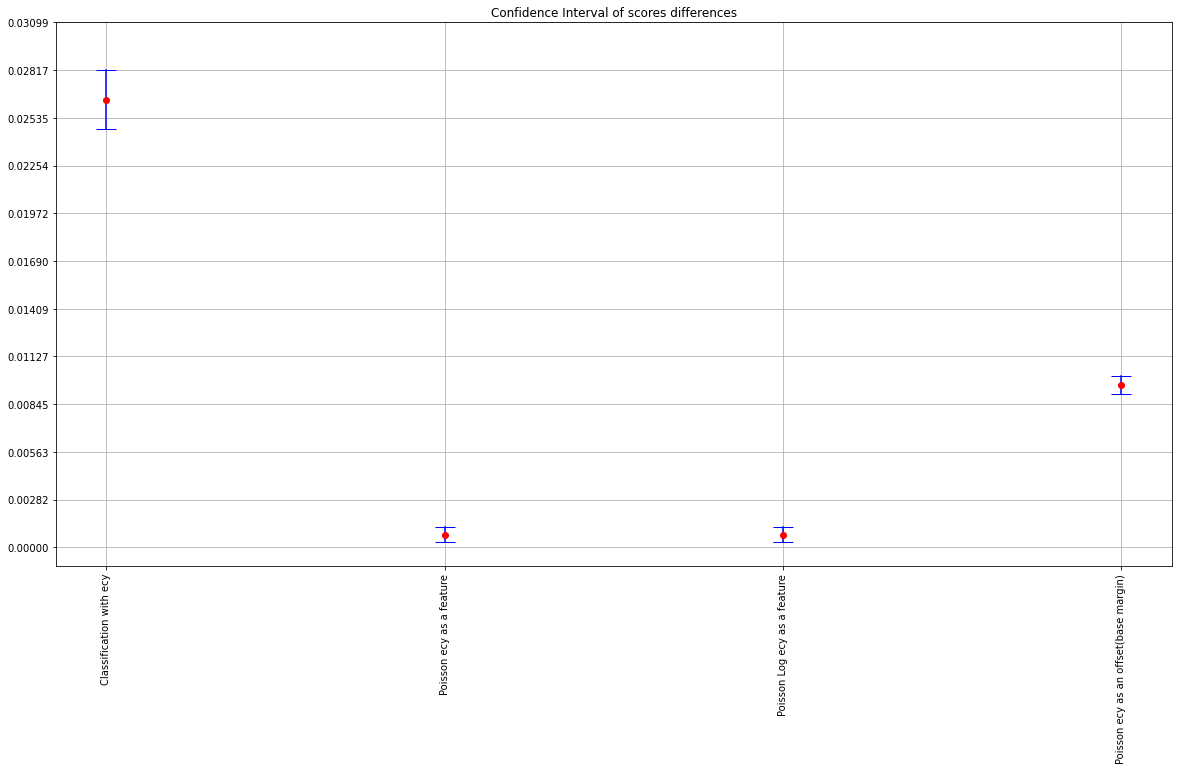

In [24]:
plt.figure(figsize=(20,10))
dim=np.arange(0,CI_df['upper'].max() + CI_df['upper'].max()/10,CI_df['upper'].max()/10)
for lower,mean,upper,x in zip(CI_df['lower'],CI_df['mean'],CI_df['upper'],range(len(CI_df))):
    plt.plot((x,x),(lower,upper),'r_-',markersize=20,color='blue')
    plt.plot(x,mean,'ro',color='red')
plt.xticks(range(len(CI_df)),list(CI_df['Model']),rotation=90)
plt.yticks(dim)
plt.grid(axis='both')
#plt.margins(x=2)
_=plt.title('Confidence Interval of scores differences')